In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from textblob import TextBlob
import nltk



In [68]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\vaibhavi
[nltk_data]     mane\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
df = pd.read_csv("Tweets.csv")

In [70]:
def get_sentiment(text):
    score = TextBlob(str(text)).sentiment.polarity
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['text'].apply(get_sentiment)

# Count sentiments
sentiment_counts = df['Sentiment'].value_counts()

print(sentiment_counts)

Sentiment
Neutral     5494
Positive    5476
Negative    3670
Name: count, dtype: int64


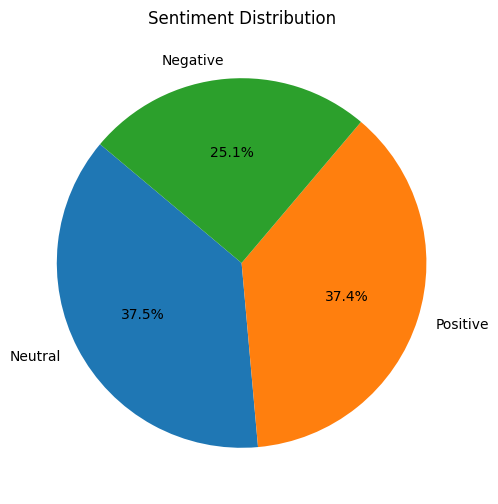

In [71]:
plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Sentiment Distribution")
plt.show()

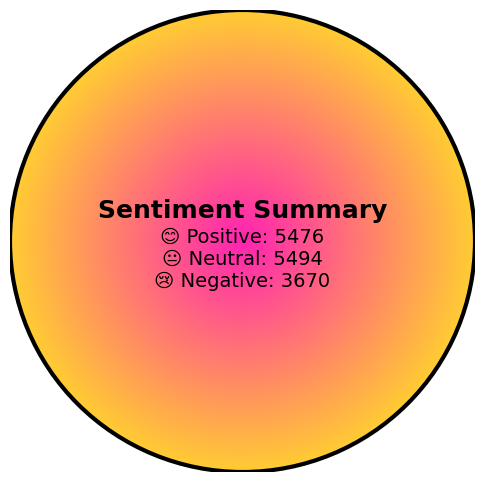

In [78]:
fig, ax = plt.subplots(figsize=(6, 6))

# Draw gradient background
for i in range(100):
    circle = Circle((0.5, 0.5), 0.5 - (i * 0.005),
                    color=(1, 0.8 - i/150, 0.2 + i/200, 1),
                    zorder=1)
    ax.add_patch(circle)

# Outer circle
outer_circle = Circle((0.5, 0.5), 0.5, fill=False, lw=3, zorder=2)
ax.add_patch(outer_circle)

# Remove axes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# ---- Fix: Add texts ABOVE all patches ---- #
positive = sentiment_counts.get("Positive", 0)
negative = sentiment_counts.get("Negative", 0)
neutral = sentiment_counts.get("Neutral", 0)

ax.text(0.5, 0.55, "Sentiment Summary",
        ha='center', fontsize=18, weight='bold', color="black", zorder=10)

ax.text(0.5, 0.40,
        f"😊 Positive: {positive}\n😐 Neutral: {neutral}\n😢 Negative: {negative}",
        ha='center', fontsize=14, color="black", zorder=10)

plt.show()
